Akurasi Model: 82.22%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-2-ea10c6e4b74d>:54: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label='Test')


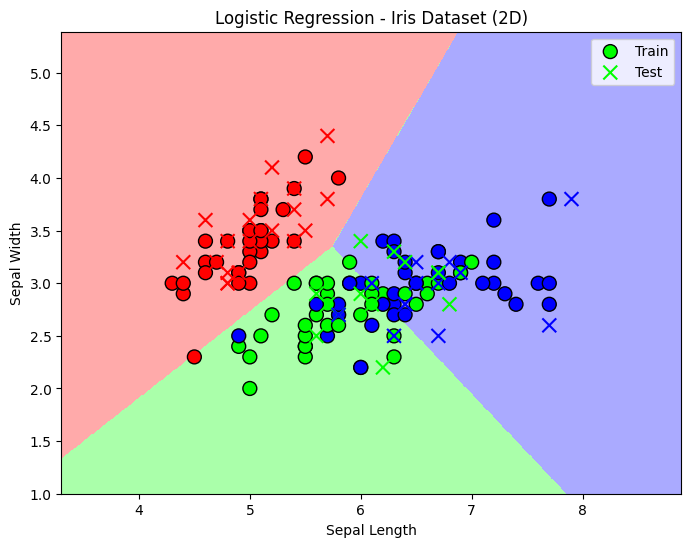

In [2]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Membaca dataset
file_path = '/content/iris.csv'
iris_df = pd.read_csv(file_path)

# Memilih dua fitur (sepal_length dan sepal_width)
X = iris_df[['sepal_length', 'sepal_width']]
y = iris_df['species']

# Mengubah label kategori (species) menjadi numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Mengevaluasi akurasi model
accuracy = model.score(X_test, y_test)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

# Visualisasi hasil klasifikasi dalam 2D
# Mendefinisikan rentang untuk grid
x_min, x_max = X['sepal_length'].min() - 1, X['sepal_length'].max() + 1
y_min, y_max = X['sepal_width'].min() - 1, X['sepal_width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Menggunakan model untuk memprediksi pada grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Membuat peta warna
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot titik-titik data
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, cmap=cmap_bold, edgecolor='k', s=100, label='Train')
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=y_test, cmap=cmap_bold, edgecolor='k', s=100, marker='x', label='Test')

# Memberikan label pada plot
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Logistic Regression - Iris Dataset (2D)')
plt.legend()
plt.show()
